In [2]:
import pandas as pd
import glob
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean


(array([1.1865e+04, 3.5600e+02, 3.1000e+01, 1.0000e+01, 6.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

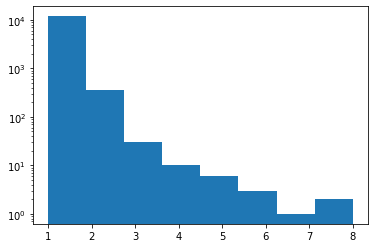

In [19]:
path = "/home/spicygremlin/Github/CS220/combined_speedup/raw/"
results = []
graph_files = glob.glob(os.path.join(path, "*-nodes.csv"))
for graph in graph_files:
    df = pd.read_csv(graph,index_col=None,header=0)
    df = df[df['in_netlist'] == 0]
    results.extend(df['history_cost'].values)
# df = pd.read_csv(graph_files[0],index_col=None,header=0)
# results = list(filter(lambda x: x > 2, results))
plt.yscale('log')
# plt.xticks(range(len(results)),results)
# print(max(results))
plt.hist(results, int(max(results)))
# plt.set_ylim([None,10^6])


In [4]:
# path = "/home/spicygremlin/Github/CS220/combined_storage/raw/"
# results = []
# graph_files = glob.glob(os.path.join(path, "strat*.csv"))
# for graph in graph_files:
#     df = pd.read_csv(graph,index_col=None,header=0)
#     results.extend(df['history_cost'].values)
# # df = pd.read_csv(graph_files[0],index_col=None,header=0)
# # results = list(filter(lambda x: x > 2, results))
# plt.yscale('log')
# plt.hist(results, 6, color="skyblue")

(array([1.486524e+06, 1.114100e+04, 1.824000e+03, 2.030000e+02,
        1.200000e+01, 6.000000e+00]),
 array([ 1.        ,  3.16666667,  5.33333333,  7.5       ,  9.66666667,
        11.83333333, 14.        ]),
 <a list of 6 Patch objects>)

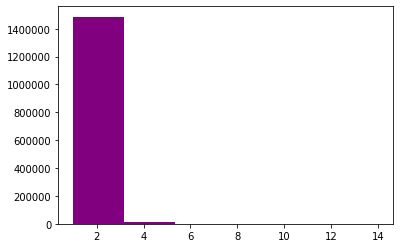

In [5]:
# path = "/mnt/e/benchmarks/graphs/TITANJR/"
# results = []
# graph_files = glob.glob(os.path.join(path, "titan_last*_historycosts.csv"))
# for graph in graph_files:
#     df = pd.read_csv(graph,index_col=None,header=0)
#     results.extend(df['History_Cost'].values)
# # df = pd.read_csv(graph_files[0],index_col=None,header=0)
# # results = list(filter(lambda x: x > 2, results))
# plt.yscale('log')
plt.hist(results, 6, color="purple")

In [6]:
path = "/mnt/e/benchmarks/Outputs/route_metrics/TITAN_TITANJR/"
r_string = "strat"


all_files = glob.glob(os.path.join(path, r_string+"*gnn*.csv"))
results = dict()
results['gnn'] = dict()
results['reg'] = dict()
results['time_gnn'] = dict()
results['time_reg'] = dict()
results['CPD_GNN'] = dict()
results['CPD_REG'] = dict()
gnn_results = dict()
reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    gnn_results[name] = max(df['Iteration'])
    # print(df[].head())
results['gnn'] = gnn_results
reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    reg_results[name] = sum(df['Time'])
results['time_gnn'] = reg_results
# print(results)
reg_results = dict()

reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['CPD (ns)'])
results['CPD_GNN'] = reg_results
# print(results)
reg_results = dict()
all_files = glob.glob(os.path.join(path, r_string+"*reg*.csv"))
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['Iteration'])
    # print(df[].head())  
results['reg'] = reg_results

reg_results = dict()
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = sum(df['Time'])
results['time_reg'] = reg_results

reg_results = dict()
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['CPD (ns)'])
results['CPD_REG'] = reg_results
    # print(df[].head())

# print(results)
my_df = pd.DataFrame.from_dict(results)
# print(my_df)
my_df['Reduction'] = (my_df['reg'].values - my_df['gnn'].values)/my_df['reg'].values
# my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)

print("Average: ", "{:.2%}".format(mean(my_df['Reduction'].values)))
# print("{:2%}".format(my_df))
pd.set_option('expand_frame_repr', False)
my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)
my_df['time_reg']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_reg']], index = my_df.index)
my_df['time_gnn']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_gnn']], index = my_df.index)
my_df['CPD_REG']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_REG']], index = my_df.index)
my_df['CPD_GNN']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_GNN']], index = my_df.index)
print(my_df)

Average:  13.21%
                                                    gnn  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
stratixiv_arch__carpat_stratixiv_arch_timing         26   22   367.91    29.58    7.86    8.15   -18.18%
stratixiv_arch__CHERI_stratixiv_arch_timing          20   20   788.06    47.55   13.65   13.64     0.00%
stratixiv_arch__CH_DFSIN_stratixiv_arch_timing       21   21   404.97    20.03   71.53   71.53     0.00%
stratixiv_arch__EKF-SLAM_Jacobians_stratixiv_ar...   33   50  1081.22    88.72   32.03   32.13    34.00%
stratixiv_arch__jacobi_stratixiv_arch_timing         17   19   421.38    18.76  198.17  198.05    10.53%
stratixiv_arch__JPEG_stratixiv_arch_timing           15   17   283.62    23.28   16.24   16.55    11.76%
stratixiv_arch__leon2_stratixiv_arch_timing          10   12    55.23     6.39    8.46    8.46    16.67%
stratixiv_arch__leon3mp_stratixiv_arch_timing        11   13   162.06    11.87   15.19   15.19    15.38%
stratixiv_arch__MCML_stratixiv_arch_ti

In [7]:
path = "/mnt/e/benchmarks/Outputs/route_metrics/"
r_string = "strat"


all_files = glob.glob(os.path.join(path, r_string+"*gnn*.csv"))
results = dict()
results['gnn'] = dict()
results['reg'] = dict()
results['time_gnn'] = dict()
results['time_reg'] = dict()
results['CPD_GNN'] = dict()
results['CPD_REG'] = dict()
gnn_results = dict()
reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    gnn_results[name] = max(df['Iteration'])
    # print(df[].head())
results['gnn'] = gnn_results
reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    reg_results[name] = sum(df['Time'])
results['time_gnn'] = reg_results
# print(results)
reg_results = dict()

reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['CPD (ns)'])
results['CPD_GNN'] = reg_results
# print(results)
reg_results = dict()
all_files = glob.glob(os.path.join(path, r_string+"*reg*.csv"))
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['Iteration'])
    # print(df[].head())  
results['reg'] = reg_results

reg_results = dict()
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = sum(df['Time'])
results['time_reg'] = reg_results

reg_results = dict()
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['CPD (ns)'])
results['CPD_REG'] = reg_results
    # print(df[].head())

# print(results)
my_df = pd.DataFrame.from_dict(results)
# print(my_df)
my_df['Reduction'] = (my_df['reg'].values - my_df['gnn'].values)/my_df['reg'].values
# my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)

print("Average: ", "{:.2%}".format(mean(my_df['Reduction'].values)))
# print("{:2%}".format(my_df))
pd.set_option('expand_frame_repr', False)
my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)
my_df['time_reg']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_reg']], index = my_df.index)
my_df['time_gnn']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_gnn']], index = my_df.index)
my_df['CPD_REG']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_REG']], index = my_df.index)
my_df['CPD_GNN']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_GNN']], index = my_df.index)
print(my_df)

Average:  nan%
                                              gnn   reg time_gnn time_reg CPD_GNN CPD_REG Reduction
stratixiv_arch__alu4                            9  11.0    11.41     0.27    9.30    9.30    18.18%
stratixiv_arch__apex2                           9  11.0    12.13     0.45   10.32   10.32    18.18%
stratixiv_arch__apex4                          10  10.0     9.96     0.39    9.23    9.27     0.00%
stratixiv_arch__bigkey                          7   5.0   122.72     1.27    7.58    7.58   -40.00%
stratixiv_arch__carpat_stratixiv_arch_timing   22   NaN   541.37      nan    7.99     nan      nan%
stratixiv_arch__clma                           10  12.0    24.44     1.94    9.55    9.55    16.67%
stratixiv_arch__des                             8  11.0   152.94     1.94   11.42   11.42    27.27%
stratixiv_arch__diffeq                          8   6.0    13.60     0.32    7.43    7.43   -33.33%
stratixiv_arch__dsip                            7   5.0   116.00     1.28    7.65    

In [8]:
path = "/mnt/e/benchmarks/Outputs/route_metrics/"
r_string = "EArch"


all_files = glob.glob(os.path.join(path, r_string+"*gnn*.csv"))
results = dict()
results['gnn'] = dict()
results['reg'] = dict()
results['time_gnn'] = dict()
results['time_reg'] = dict()
results['CPD_GNN'] = dict()
results['CPD_REG'] = dict()
gnn_results = dict()
reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    gnn_results[name] = max(df['Iteration'])
    # print(df[].head())
results['gnn'] = gnn_results
reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    reg_results[name] = sum(df['Time'])
results['time_gnn'] = reg_results
# print(results)
reg_results = dict()

reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['CPD (ns)'])
results['CPD_GNN'] = reg_results
# print(results)
reg_results = dict()
all_files = glob.glob(os.path.join(path, r_string+"*reg*.csv"))
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['Iteration'])
    # print(df[].head())  
results['reg'] = reg_results

reg_results = dict()
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = sum(df['Time'])
results['time_reg'] = reg_results

reg_results = dict()
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['CPD (ns)'])
results['CPD_REG'] = reg_results
    # print(df[].head())

# print(results)
my_df = pd.DataFrame.from_dict(results)
# print(my_df)
my_df['Reduction'] = (my_df['reg'].values - my_df['gnn'].values)/my_df['reg'].values
# my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)

print("Average: ", "{:.2%}".format(mean(my_df['Reduction'].values)))
# print("{:2%}".format(my_df))
pd.set_option('expand_frame_repr', False)
my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)
my_df['time_reg']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_reg']], index = my_df.index)
my_df['time_gnn']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_gnn']], index = my_df.index)
my_df['CPD_REG']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_REG']], index = my_df.index)
my_df['CPD_GNN']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_GNN']], index = my_df.index)
print(my_df)

Average:  -2.74%
                 gnn  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
EArch__alu4       14   14     8.18     3.19    5.50    5.50     0.00%
EArch__apex2      15   15     9.53     4.25    6.30    6.30     0.00%
EArch__apex4      15   15     8.89     3.36    5.25    5.25     0.00%
EArch__bigkey     11   11    10.51     4.65    2.64    2.64     0.00%
EArch__clma       15   15    21.63    19.18   11.31   11.31     0.00%
EArch__des        14   13    11.38     6.52    5.20    5.20    -7.69%
EArch__diffeq     14   14     8.46     3.19    6.44    6.44     0.00%
EArch__dsip       13   12    11.43     4.29    2.63    2.63    -8.33%
EArch__elliptic   14   13    13.40     6.94    9.06    9.06    -7.69%
EArch__ex1010     16   16    15.33    10.98    7.45    7.44     0.00%
EArch__ex5p       15   16     8.18     2.57    5.36    5.36     6.25%
EArch__frisc      15   13    12.31     6.65   11.84   11.84   -15.38%
EArch__misex3     15   15     8.68     3.61    5.16    5.16     0.00%
EAr

In [9]:
path = "/mnt/e/benchmarks/Outputs/route_metrics/"
all_files = glob.glob(os.path.join(path, "EArch*gnn*.csv"))
results = dict()
results['gnn'] = dict()
results['reg'] = dict()
gnn_results = dict()
reg_results = dict()
for gnn_metric in all_files:
    lf = gnn_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__gnn__")[0]
    # print(name)
    df = pd.read_csv(gnn_metric,index_col=None,header=0)
    
    gnn_results[name] = max(df['Iteration'])
    # print(df[].head())
results['gnn'] = gnn_results
# print(results)
reg_results = dict()
all_files = glob.glob(os.path.join(path, "EArch*reg*.csv"))
for reg_metric in all_files:
    lf = reg_metric.split("/")[-1]
    lf = lf.split(".")[0]
    name = lf.split("__reg__")[0]
    # print(name)
    df = pd.read_csv(reg_metric,index_col=None,header=0)
    
    reg_results[name] = max(df['Iteration'])
    # print(df[].head())
results['reg'] = reg_results

# print(results)
my_df = pd.DataFrame.from_dict(results)
# print(my_df)

my_df['Reduction'] = (my_df['reg'].values - my_df['gnn'].values)/my_df['reg'].values
print("Average: ", "{:.2%}".format(mean(my_df['Reduction'].values)))

my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)

print(my_df)


Average:  -2.74%
                 gnn  reg Reduction
EArch__alu4       14   14     0.00%
EArch__apex2      15   15     0.00%
EArch__apex4      15   15     0.00%
EArch__bigkey     11   11     0.00%
EArch__clma       15   15     0.00%
EArch__des        14   13    -7.69%
EArch__diffeq     14   14     0.00%
EArch__dsip       13   12    -8.33%
EArch__elliptic   14   13    -7.69%
EArch__ex1010     16   16     0.00%
EArch__ex5p       15   16     6.25%
EArch__frisc      15   13   -15.38%
EArch__misex3     15   15     0.00%
EArch__pdc        17   17     0.00%
EArch__s298       15   14    -7.14%
EArch__s38417     14   14     0.00%
EArch__s38584     14   12   -16.67%
EArch__seq        15   14    -7.14%
EArch__spla       16   16     0.00%
EArch__tseng      10   11     9.09%
